In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

# MODELO COMPLETO

### Constantes

In [66]:
#Conductividades: se expresan en [mS/cm^2], pero tras normalizar la ecuación quedan adimensionales
g_Na = 120
g_K = 36 
g_Cl = 2*0.3


#Voltajes de inversion [mV]
V_Na = 50
V_K = -77
V_Cl = -54.4

#Capacitancia (C): se expresa en [uF/cm^2], pero tras normalizar la ecuación queda en [ms] y vale 1, por lo que ni se incluye en la ecuación

### Funciones

In [67]:
#Funciones auxiliares

def inf_x(a, b):
    '''
    Devuelve el valor para t = inf en función de los coeficientes a y b
    '''
    inf = a/(a+b)
    return inf

def tau_x(a, b):
    '''
    Devuelve el parámetro tau en función de los coeficientes a y b
    '''
    tau = 1/(a+b)
    return tau

#Ecuaciones diferenciales del modelo
def derivada(t, u, I):
    '''
    Recibe el parámetro I y los valores actuales del vector de variables u = (v, m, h, n)
    y devuelve la derivada de cada una de dichas variables
    '''
    v = u[0]
    m = u[1]
    h = u[2]
    n = u[3]

    #v
    dv = I - g_Na*(m**3)*h*(v-V_Na) - g_K*(n**4)*(v-V_K) - g_Cl*(v-V_Cl)

    #m
    a_m = 0.1*(v+40)/(1-np.exp((-v-40)/10))
    b_m = 4*np.exp((-v-65)/18)
    inf_m = inf_x(a_m, b_m)
    tau_m = tau_x(a_m, b_m)
    dm = (inf_m - m)/tau_m

    #h
    a_h = 0.07*np.exp((-v-65)/20)
    b_h = 1/(1+np.exp((-v-35)/10))
    inf_h = inf_x(a_h, b_h)
    tau_h = tau_x(a_h, b_h)
    dh = (inf_h - h)/tau_h

    #n
    a_n = 0.01*(v+55)/(1-np.exp((-v-55)/10))
    b_n = 0.125*np.exp((-v-65)/80)
    inf_n = inf_x(a_n, b_n)
    tau_n = tau_x(a_n, b_n)
    dn = (inf_n - n)/tau_n

    du = [dv, dm, dh, dn]

    return du

### Valores iniciales (para el primer valor de corriente)

In [68]:
v0 = -60 #[mV]

a_m0 = 0.1*(v0+40)/(1-np.exp((-v0-40)/10))
b_m0 = 4*np.exp((-v0-65)/18)
m0 = inf_x(a_m0, b_m0)

a_h0 = 0.07*np.exp((-v0-65)/20)
b_h0 = 1/(1+np.exp((-v0-35)/10))
h0 = inf_x(a_h0, b_h0)

a_n0 = 0.01*(v0+55)/(1-np.exp((-v0-55)/10))
b_n0 = 0.125*np.exp((-v0-65)/80)
n0 = inf_x(a_n0, b_n0)

### Vector de corrientes externas a probar, vector de frecuencias obtenidas y tiempos de la simulación

In [69]:
#Valores de corriente externa a utilizar
K = 101 #Cantidad de pasos
I1 = np.linspace(0, 50, K) #[uA/cm^2]

#Frecuencias obtenidas ()
f1 = np.zeros(K)
f2 = np.zeros(K)

#Tiempos
t_ini = 0   #[ms]
t_fin = 100 #[ms]

### Solución numérica: corriente creciente

i = 0.0


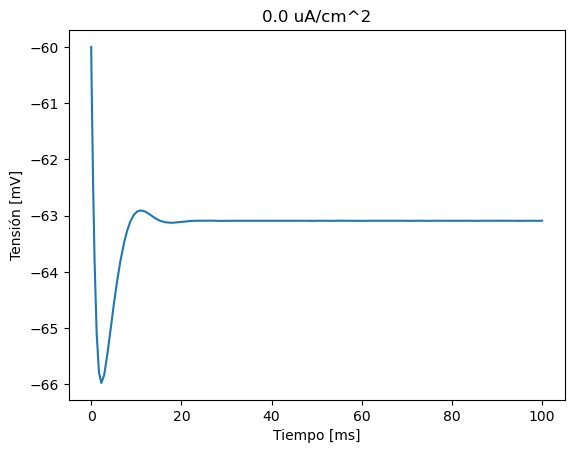

i = 10.0


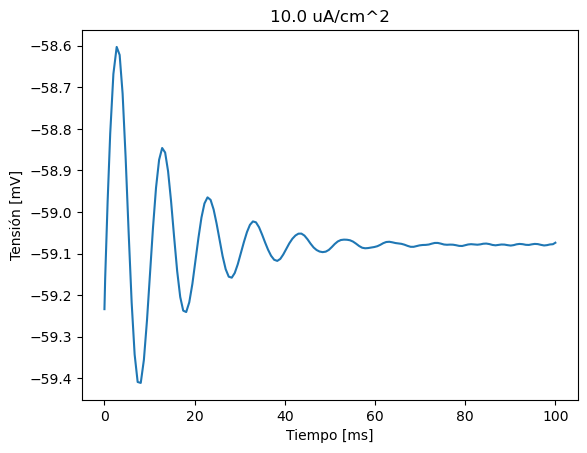

C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:32: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(v+40)/(1-np.exp((-v-40)/10))
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:33: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp((-v-65)/18)
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  dm = (inf_m - m)/tau_m
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:39: RuntimeWarning: overflow encountered in exp
  a_h = 0.07*np.exp((-v-65)/20)
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:40: RuntimeWarning: overflow encountered in exp
  b_h = 1/(1+np.exp((-v-35)/10))
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:7: RuntimeWarning: invalid value encountered in scalar divide
  inf = a/(a+b)
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:46: RuntimeWarning: overflow encountered in exp
  a_n = 0.01*(v+

i = 20.0


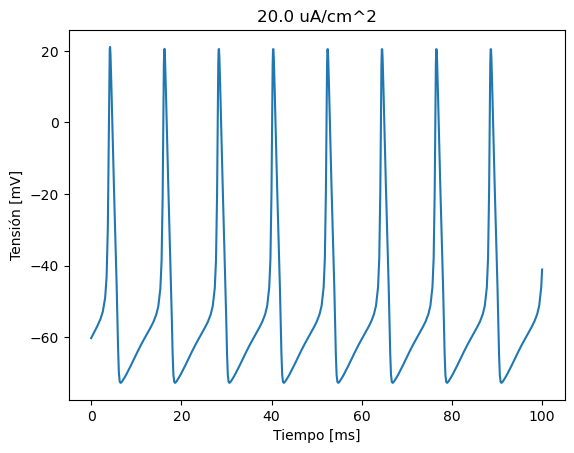

i = 30.0


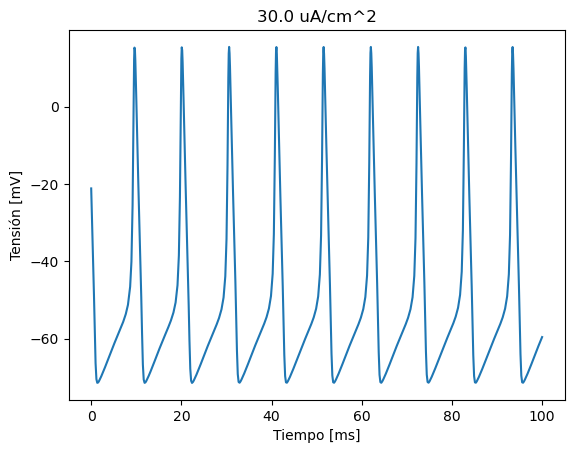

i = 40.0


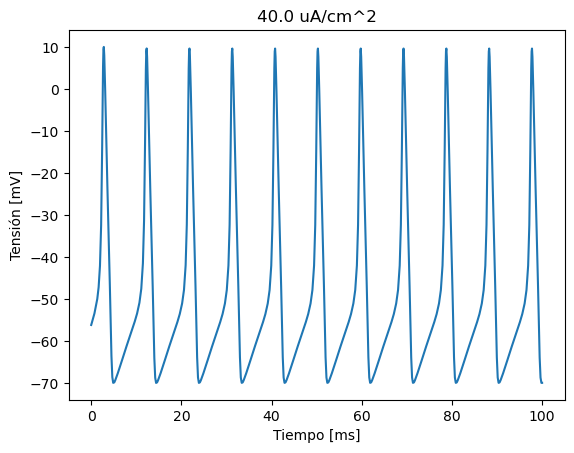

i = 50.0


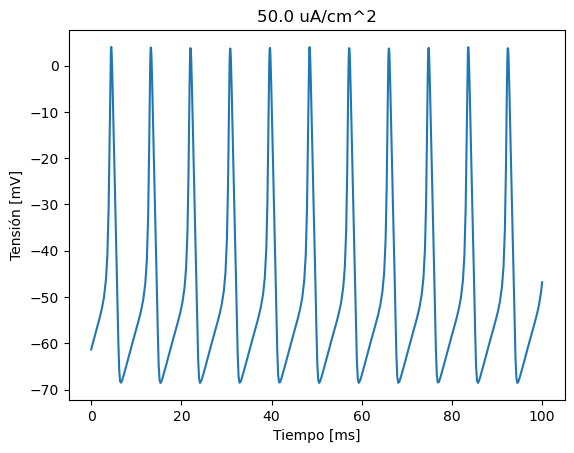

In [70]:
for j in range(K):
    result = solve_ivp(lambda t, u: derivada(t, u, I1[j]), [t_ini, t_fin], [v0, m0, h0, n0])

    #Resultados de la solución numérica
    t = result.t
    v = result.y[0]
    m = result.y[1]
    h = result.y[2]
    n = result.y[3]

    #Comparo m con inf_m para ver qué tan válida es la simplificación
    a_m = 0.1*(v+40)/(1-np.exp((-v-40)/10))
    b_m = 4*np.exp((-v-65)/18)
    inf_m = inf_x(a_m, b_m)

    #Actualizo la semilla para la próxima simulación
    v0 = v[-1]
    m0 = m[-1]
    h0 = h[-1]
    n0 = n[-1]

    '''
    Graficar v(t) para algunos valores de corriente
    También grafico m, inf_m y la suma h+n para verificar la validez de las simplificaciones propuestas 
    '''
    if(j%20 == 0):
        print("i = " + str(I1[j]))
        plt.plot(t, v)
        plt.title(str(I1[j]) + " uA/cm^2")
        plt.xlabel("Tiempo [ms]")
        plt.ylabel("Tensión [mV]")
        plt.show()

        # plt.plot(t, m, label = "m")
        # plt.plot(t, inf_m, label = "$m_{inf}$")
        # plt.legend()
        # plt.title(str(I1[j]) + " uA/cm^2")
        # plt.show()

        # plt.plot(t, h, label = "h")
        # plt.plot(t,v/80 + 1)
        # plt.legend()
        # plt.title(str(I1[j]) + " uA/cm^2")
        # plt.show()

        # plt.plot(t, m, label = "m")
        # plt.plot(t,v/80 + 1)
        # plt.legend()
        # plt.title(str(I1[j]) + " uA/cm^2")
        # plt.show()

        # plt.plot(t, n, label = "n")
        # plt.plot(t,v/80 + 1)
        # plt.legend()
        # plt.title(str(I1[j]) + " uA/cm^2")
        # plt.show()

        # plt.plot(t, h, label = "h")
        # plt.plot(t, m, label = "m")
        # plt.plot(t,v/80 + 1)
        # plt.legend()
        # plt.title(str(I1[j]) + " uA/cm^2")
        # plt.show()

    max = find_peaks(v, height=-30)[0] #Indice de los máximos obtenidos (me fijo que sean mayores a 0 mV)

    if(len(max) < 2):
        f1[j] = 0
        continue

    T = 0
    for k in range(len(max) - 1):
        T += t[max[k+1]] - t[max[k]]
    
    T = T/(len(max)-1) #[ms]

    f1[j] = 1000/T #[Hz]

### Solución numérica: corriente decreciente

i = 50.0


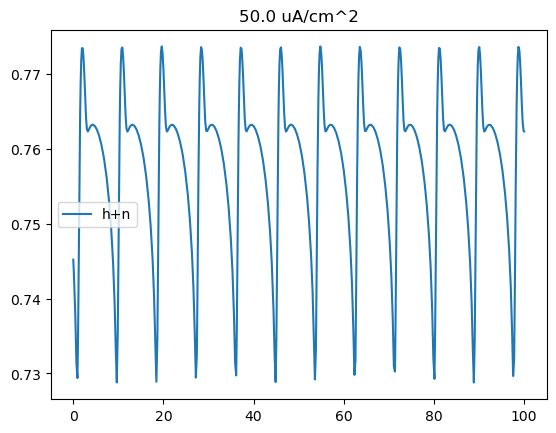

C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:32: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(v+40)/(1-np.exp((-v-40)/10))
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:33: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp((-v-65)/18)
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  dm = (inf_m - m)/tau_m
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:39: RuntimeWarning: overflow encountered in exp
  a_h = 0.07*np.exp((-v-65)/20)
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:40: RuntimeWarning: overflow encountered in exp
  b_h = 1/(1+np.exp((-v-35)/10))
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:7: RuntimeWarning: invalid value encountered in scalar divide
  inf = a/(a+b)
C:\Users\gatoa\AppData\Local\Temp\ipykernel_7096\2787474632.py:46: RuntimeWarning: overflow encountered in exp
  a_n = 0.01*(v+

i = 40.0


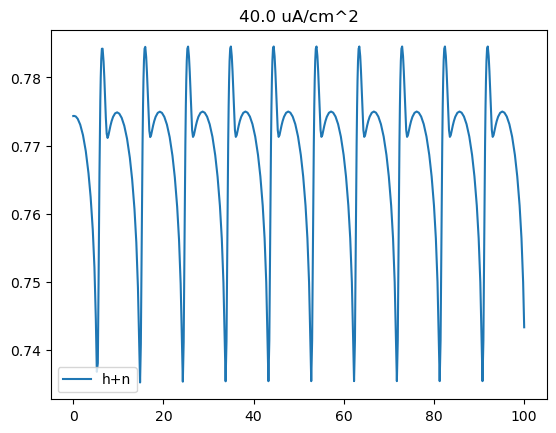

i = 30.0


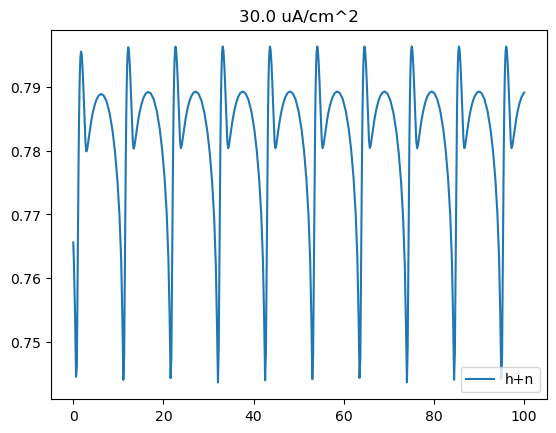

i = 20.0


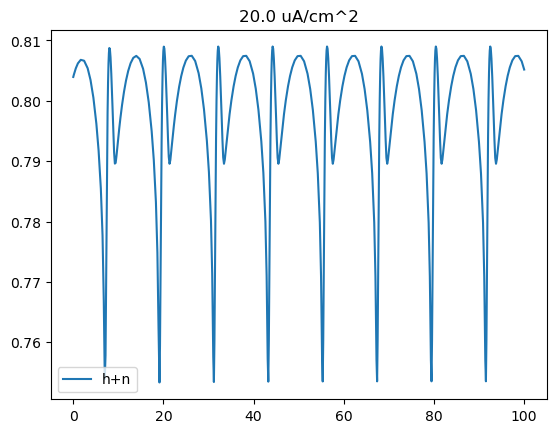

i = 10.0


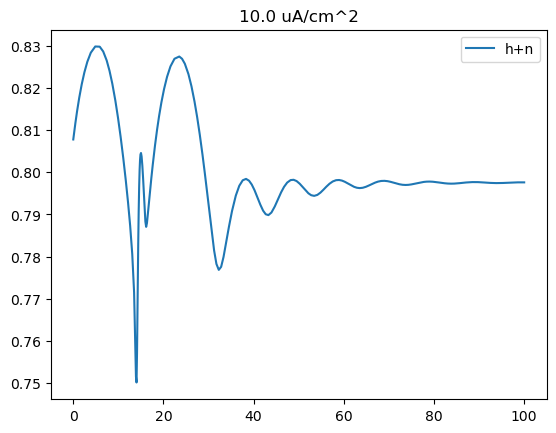

i = 0.0


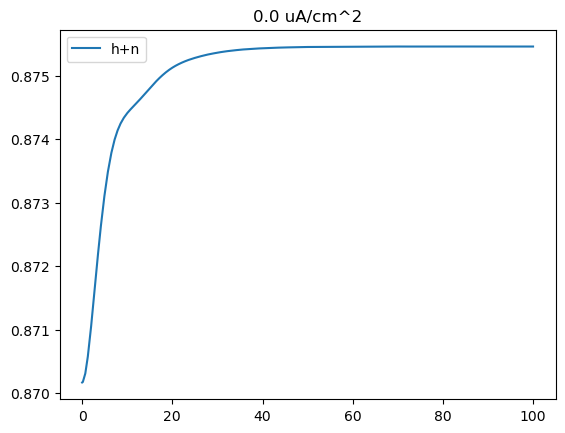

In [71]:
I2 = np.flip(I1)

for j in range(K):
    result = solve_ivp(lambda t, u: derivada(t, u, I2[j]), [t_ini, t_fin], [v0, m0, h0, n0])

    #Resultados de la solución numérica
    t = result.t
    v = result.y[0]
    m = result.y[1]
    h = result.y[2]
    n = result.y[3]

    #Comparo m con inf_m para ver qué tan válida es la simplificación
    a_m = 0.1*(v+40)/(1-np.exp((-v-40)/10))
    b_m = 4*np.exp((-v-65)/18)
    inf_m = inf_x(a_m, b_m)

    #Actualizo la semilla para la próxima simulación
    v0 = v[-1]
    m0 = m[-1]
    h0 = h[-1]
    n0 = n[-1]

    '''
    Graficar v(t) para algunos valores de corriente
    También grafico m, inf_m y la suma h+n para verificar la validez de las simplificaciones propuestas 
    '''
    if(j%20 == 0):
        print("i = " + str(I2[j]))
    #     plt.plot(t, v)
    #     plt.title(str(I[j]) + " uA/cm^2")
    #     plt.xlabel("Tiempo [ms]")
    #     plt.ylabel("Tensión [mV]")
    #     plt.show()
        # plt.plot(t, m, label = "m")
        # plt.plot(t, inf_m, label = "$m_{inf}$")
        # plt.legend()
        # plt.title(str(I2[j]) + " uA/cm^2")
        # plt.show()

        plt.plot(t, h+n, label = "h+n")
        plt.legend()
        plt.title(str(I2[j]) + " uA/cm^2")
        plt.show()


    max = find_peaks(v, height=-30)[0] #Indice de los máximos obtenidos (me fijo que sean mayores a 0 mV)

    if(len(max) < 2):
        f2[j] = 0
        continue

    T = 0
    for k in range(len(max) - 1):
        T += t[max[k+1]] - t[max[k]]
    
    T = T/(len(max)-1) #[ms]

    f2[j] = 1000/T #[Hz]  


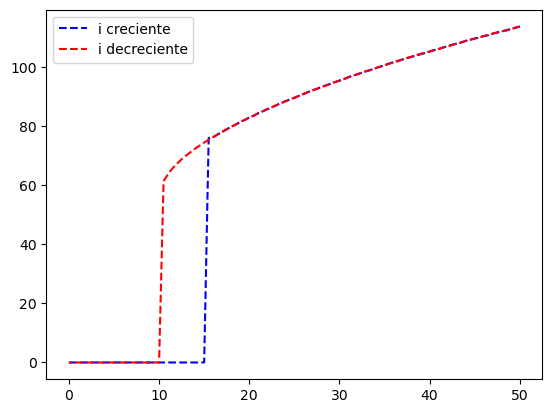

In [72]:
plt.plot(I1, f1, ls = '--', color = 'b', label = "i creciente")
plt.plot(I2, f2, ls = '--', color = 'r', label = "i decreciente")
plt.legend()
plt.show()